# Nettoyage des données Camp_Market

Ce notebook présente les étapes de nettoyage du fichier Camp_Market.csv.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ====================================================================
# ÉTAPE 1: CHARGEMENT, NETTOYAGE ET INGÉNIERIE DES CARACTÉRISTIQUES
# ====================================================================
# Toutes les étapes de préparation sont consolidées ici pour assurer la cohérence.

# 1.1. Charger les données brutes
df = pd.read_csv('Camp_Market.csv', sep=';')

# 1.2. Nettoyage initial
# Supprimer les colonnes inutiles
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

# Remplacer les valeurs manquantes de 'Income' par la moyenne
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Convertir 'Dt_Customer' en datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# 1.3. Ingénierie des caractéristiques
# Calculer l'âge et l'ancienneté
df['Age'] = 2015 - df['Year_Birth']
df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

# Calculer les dépenses et achats totaux
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Calculer le nombre de personnes à charge
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# 1.4. Filtrer les données aberrantes
df = df[df['Age'] < 100].copy()

# 1.5. Sauvegarder le jeu de données nettoyé (optionnel mais bonne pratique)
df.to_csv('Camp_Market_cleaned.csv', index=False)

print("Le jeu de données a été nettoyé et les caractéristiques ont été créées.")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Préparation et Ingénierie des Caractéristiques (DÉJÀ FAIT)

L'analyse qui suit utilise le DataFrame `df` qui a été entièrement préparé dans la première cellule. Les étapes de création de caractéristiques comme `Age`, `Total_Spending`, etc., ont déjà été effectuées.

ID                              int64
Year_Birth                      int64
Education                    category
Marital_Status               category
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [ ]:
# Visualisation des distributions d'âge et d'ancienneté
plt.figure(figsize=(16, 5))

# Distribution de l'âge
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")

# Distribution de l'ancienneté
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Tenure_Days', bins=30, kde=True)
plt.title("Distribution de l'ancienneté des clients")
plt.xlabel("Ancienneté (en jours)")
plt.ylabel("Nombre de clients")

plt.tight_layout()
plt.show()

Valeurs manquantes par colonne :
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
## 2. Analyse des Dépenses et Achats

Ici, nous consolidons les données de dépenses et d'achats pour obtenir des indicateurs globaux. Cela simplifie l'analyse et nous donne un aperçu rapide du comportement de consommation de chaque client.

# Visualisation de la relation entre le revenu, les achats et les dépenses totales
plt.figure(figsize=(16, 5))

# Dépenses totales vs. Revenu
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Income', y='Total_Spending', alpha=0.6)
plt.title("Dépenses totales vs. Revenu")
plt.xlabel("Revenu")
plt.ylabel("Dépenses totales")

# Dépenses totales vs. Nombre d'achats
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Total_Purchases', y='Total_Spending', alpha=0.6)
plt.title("Dépenses totales vs. Nombre d'achats")
plt.xlabel("Nombre total d'achats")
plt.ylabel("Dépenses totales")

plt.tight_layout()
plt.show()

## 1. Ingénierie des Caractéristiques Démographiques et de Clientèle

Dans cette section, nous calculons l'âge des clients et leur ancienneté avec l'entreprise. Ces informations sont cruciales pour évaluer si l'âge ou la durée de la relation client influencent les habitudes de dépense et les réponses aux campagnes.

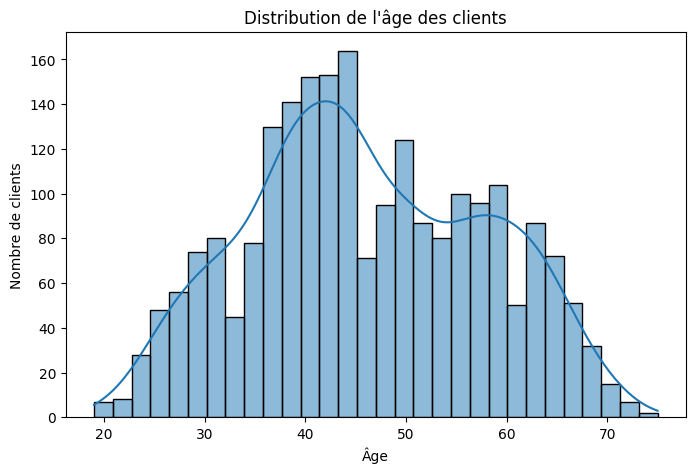

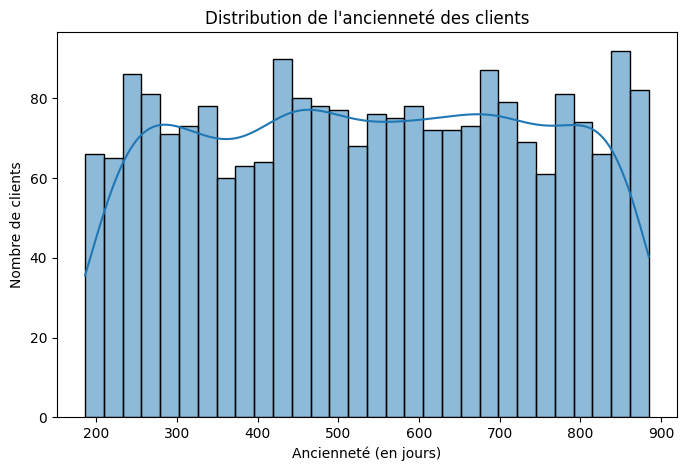

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le jeu de données nettoyé
df = pd.read_csv('Camp_Market_cleaned.csv')

# Calcul de l'âge des clients
df['Age'] = 2015 - df['Year_Birth']
df = df[df['Age'] < 100]  # Suppression des âges anormaux

# Calcul de l'ancienneté en jours
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

# Visualisation de la distribution de l'âge
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()

# Visualisation de la distribution de l'ancienneté
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Tenure_Days', bins=30, kde=True)
plt.title("Distribution de l'ancienneté des clients")
plt.xlabel("Ancienneté (en jours)")
plt.ylabel("Nombre de clients")
plt.show()

## 2. Caractéristiques de Dépenses et d'Achats

Ici, nous consolidons les données de dépenses et d'achats pour obtenir des indicateurs globaux. Cela simplifie l'analyse et nous donne un aperçu rapide du comportement de consommation de chaque client.

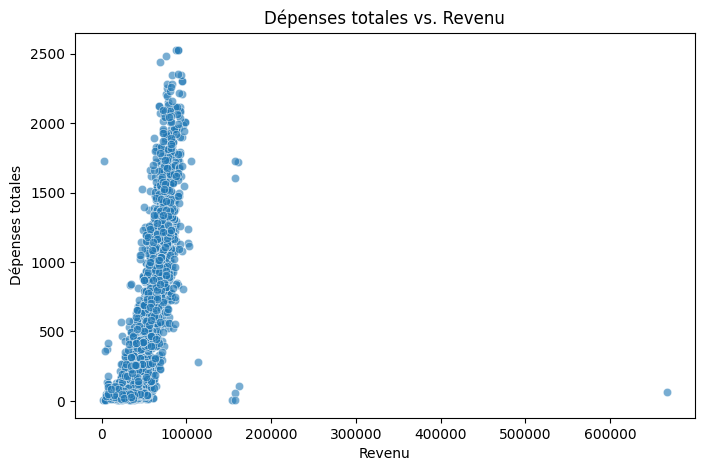

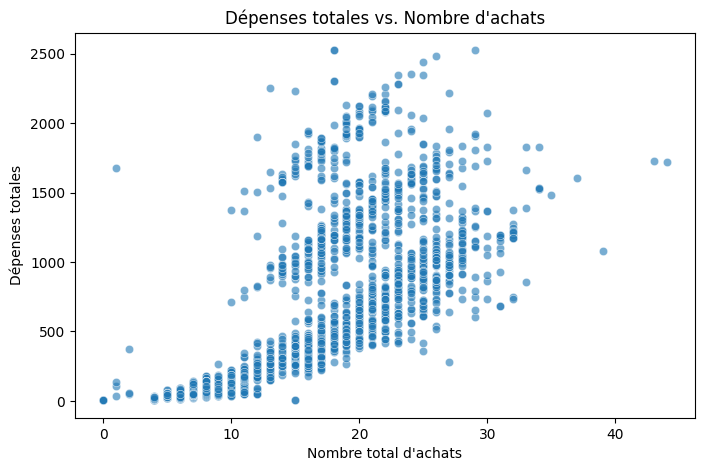

In [27]:
# Charger le jeu de données nettoyé
df = pd.read_csv('Camp_Market_cleaned.csv')

# Calcul des dépenses totales
spending_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Calcul du nombre total d'achats
purchase_cols = [
    'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumDealsPurchases'
]
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Visualisation de la relation entre le revenu et les dépenses totales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Income', y='Total_Spending', alpha=0.6)
plt.title("Dépenses totales vs. Revenu")
plt.xlabel("Revenu")
plt.ylabel("Dépenses totales")
plt.show()

# Visualisation de la relation entre le nombre d'achats et les dépenses totales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Total_Purchases', y='Total_Spending', alpha=0.6)
plt.title("Dépenses totales vs. Nombre d'achats")
plt.xlabel("Nombre total d'achats")
plt.ylabel("Dépenses totales")
plt.show()

## 3. Caractéristiques Familiales

Nous combinons le nombre d'enfants et d'adolescents pour obtenir un indicateur unique du nombre de personnes à charge. Ce chiffre peut avoir une influence significative sur le pouvoir d'achat et le type de produits consommés.

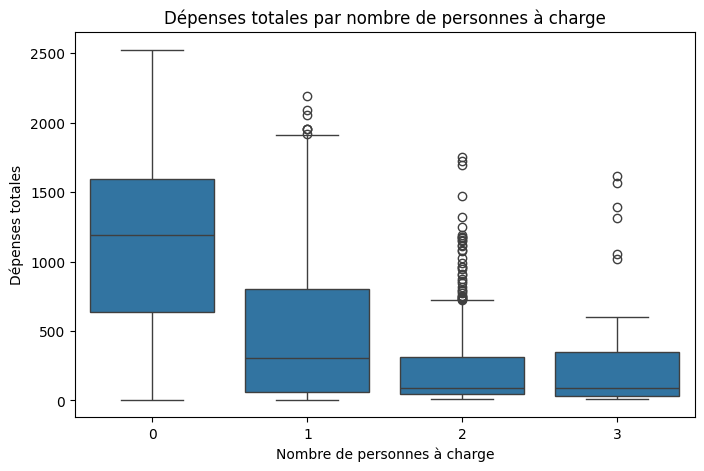

In [29]:
# Charger le jeu de données nettoyé
df = pd.read_csv('Camp_Market_cleaned.csv')

spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Création de la colonne "Dependents"
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Visualisation de la relation entre le nombre de personnes à charge et les dépenses totales
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Dependents', y='Total_Spending')
plt.title("Dépenses totales par nombre de personnes à charge")
plt.xlabel("Nombre de personnes à charge")
plt.ylabel("Dépenses totales")
plt.show()

## 4. Nombre d'achats 

Achats 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv('Camp_Market_cleaned.csv')

# S'assurer que les colonnes d'achats sont numériques
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
for col in purchase_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remplacer les NaN potentiels par 0 après la conversion
df[purchase_cols] = df[purchase_cols].fillna(0)

# Calculer le total des achats
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Créer le scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Income', y='Total_Purchases')
plt.title('Relation entre le Revenu et le Nombre Total d\'Achats')
plt.xlabel('Revenu')
plt.ylabel('Nombre Total d\'Achats')
sns.despine(left=True)
plt.show()

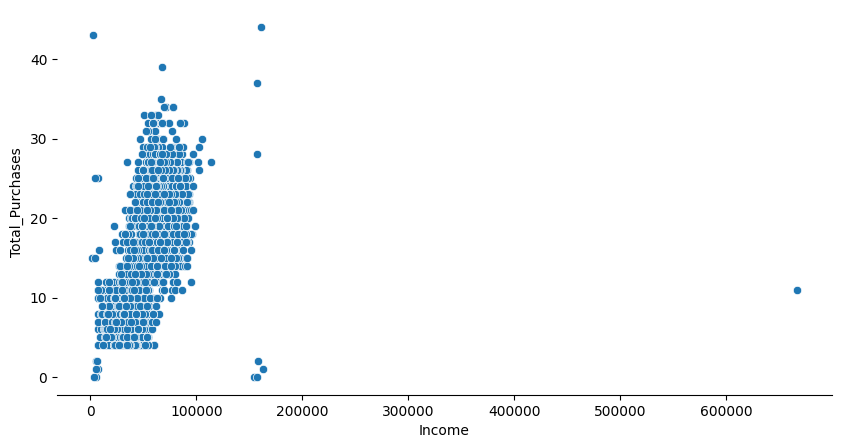

In [34]:
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Income', y='Total_Purchases')
sns.despine(left=True)
plt.show()

## 4. Évaluation de l'efficacité des campagnes

L'évaluation de l'efficacité des campagnes passées est la première étape de l'analyse. L'objectif est de mesurer le taux de succès de chaque campagne en calculant le pourcentage de clients qui ont accepté l'offre.

Taux d'acceptation de chaque campagne :
Response        14.910714
AcceptedCmp4     7.455357
AcceptedCmp3     7.276786
AcceptedCmp5     7.276786
AcceptedCmp1     6.428571
AcceptedCmp2     1.339286
dtype: float64


/var/folders/9y/hlyw969519722zx5yt0_vwvm0000gn/T/ipykernel_32131/2039630023.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette='viridis')


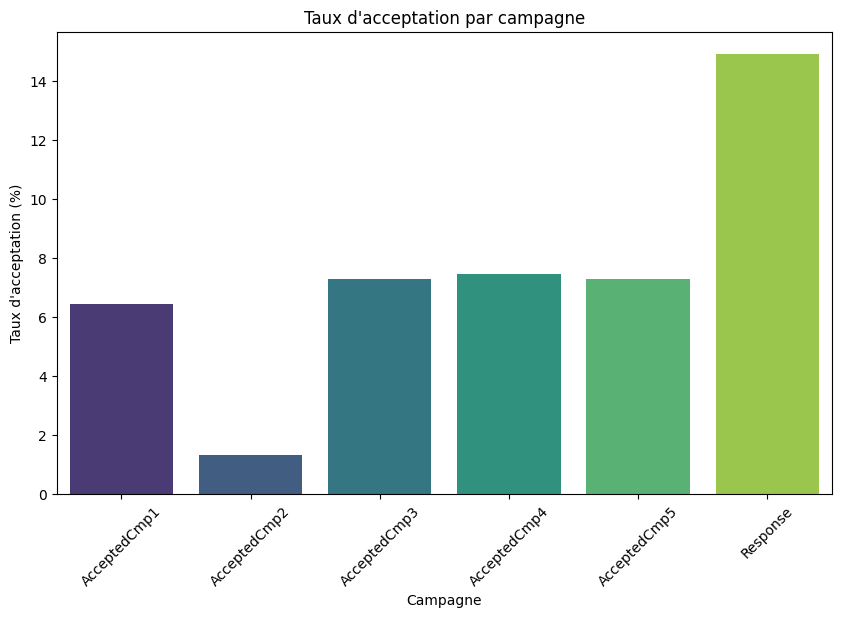

In [30]:
# Calcul et visualisation des taux d'acceptation des campagnes
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_acceptance_rates = df[campaign_cols].mean() * 100

print("Taux d'acceptation de chaque campagne :")
print(campaign_acceptance_rates.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette='viridis')
plt.title("Taux d'acceptation par campagne")
plt.xlabel('Campagne')
plt.ylabel("Taux d'acceptation (%)")
plt.xticks(rotation=45)
plt.show()

# Segmentation des clients

L'objectif est de regrouper les clients en segments distincts en fonction de leurs caractéristiques et comportements. Cela nous permettra de comprendre les différents profils de notre clientèle et de personnaliser les futures stratégies de marketing.

## 5. Préparation des données pour le clustering

Avant de segmenter, il est essentiel de normaliser les données numériques. Les algorithmes de clustering comme K-Means sont sensibles à l'échelle des variables. Normaliser les données garantit que chaque caractéristique a un poids égal dans le processus de clustering.

## 6. Détermination du nombre de clusters
Nous utiliserons la méthode du coude ("Elbow Method") pour déterminer le nombre optimal de clusters. Cette méthode consiste à tracer le "within-cluster sum of squares" (WSS) pour différents nombres de clusters et à identifier le point du graphique où la distorsion diminue de manière moins significative, formant un "coude".

## 7. Création et profilage des clusters

Une fois le nombre optimal de clusters déterminé, nous appliquerons l'algorithme K-Means pour assigner chaque client à un cluster. Ensuite, nous analyserons les caractéristiques moyennes de chaque cluster pour créer des profils de clients détaillés. Par exemple, un cluster pourrait être composé de "gros dépensiers" tandis qu'un autre pourrait être des "clients sensibles aux promotions".

/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/clus

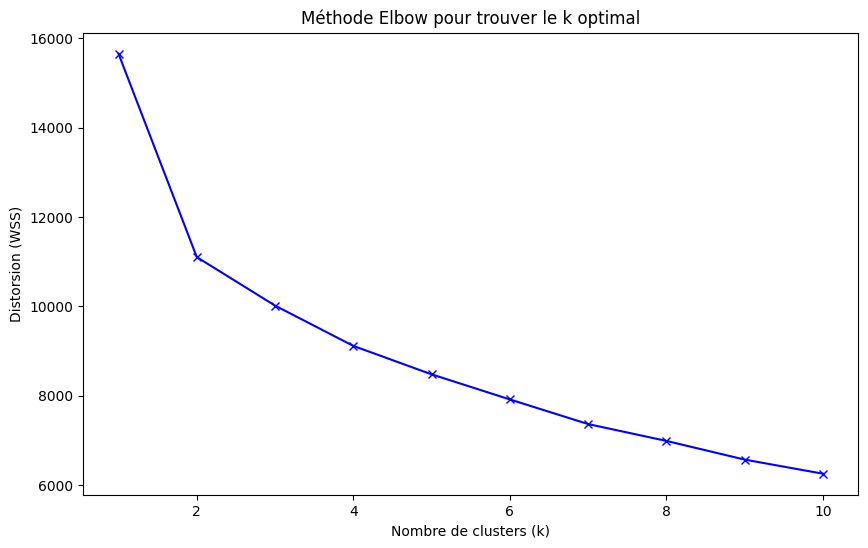


Profils des clients par cluster (valeurs moyennes) :
               Income  Total_Spending  Total_Purchases    Recency        Age  \
Cluster                                                                        
0        43253.377660      138.398734         9.556962  50.995781  51.575949   
1        78983.003924     1415.929550        20.170254  49.579256  46.219178   
2        31035.331551      109.784615         7.941538  48.567692  37.983077   
3        59498.517455      821.506645        22.038206  47.792359  50.445183   

         Dependents  Tenure_Days  Customer_Count  
Cluster                                           
0          1.879747   463.301688             474  
1          0.088063   523.422701             511  
2          0.812308   529.393846             650  
3          1.101329   625.134551             602  


/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/clus

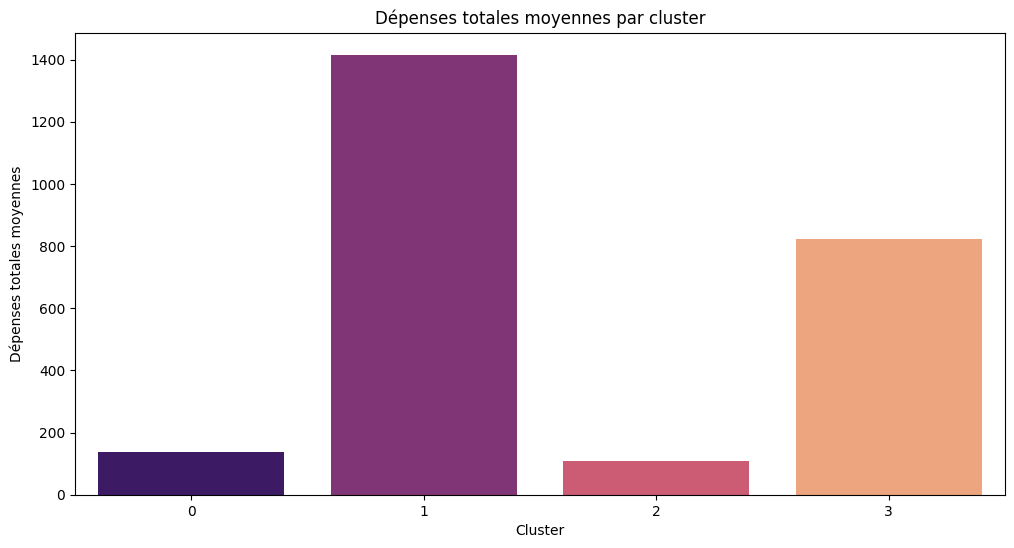

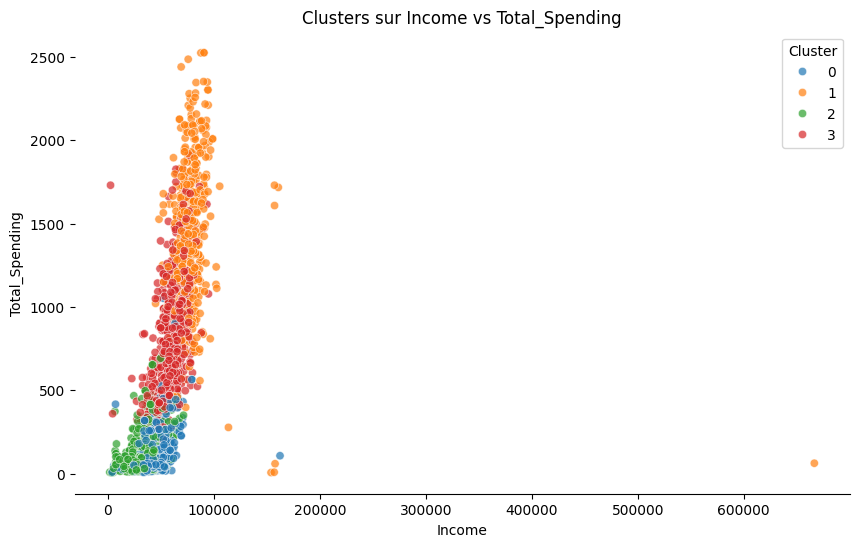

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1) Load data (comma-separated CSV)
df = pd.read_csv('Camp_Market_cleaned.csv')  # default sep=','

# 2) Feature engineering (recreate everything needed)
# Handle missing income
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Parse date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Age and tenure
df['Age'] = 2015 - df['Year_Birth']
df = df[df['Age'] < 100].copy()  # drop obvious outliers
df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

# Totals
spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

purchase_cols = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# 3) Select features and scale
clustering_features = ['Income', 'Total_Spending', 'Total_Purchases', 'Recency', 'Age', 'Dependents', 'Tenure_Days']

# Safety check: ensure all columns exist
missing = [c for c in clustering_features if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns before scaling: {missing}")

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[clustering_features])

# 4) Elbow method
distortions = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    distortions.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distorsion (WSS)')
plt.title('Méthode Elbow pour trouver le k optimal')
plt.show()

# 5) Fit final model (adjust optimal_k based on the elbow)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 6) Profile clusters
cluster_profiles = df.groupby('Cluster')[clustering_features].mean().sort_index()
# Add counts aligned to clusters
counts = df['Cluster'].value_counts().sort_index()
cluster_profiles['Customer_Count'] = counts.reindex(cluster_profiles.index, fill_value=0)

print("\nProfils des clients par cluster (valeurs moyennes) :")
print(cluster_profiles)

# 7) Visualize a metric per cluster (bar)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=cluster_profiles.reset_index(),
    x='Cluster', y='Total_Spending', palette='magma'
)
plt.title('Dépenses totales moyennes par cluster')
plt.xlabel('Cluster')
plt.ylabel('Dépenses totales moyennes')
plt.show()

# 8) Optional: visualize clusters in 2D (Income vs Total_Spending)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='Income', y='Total_Spending',
    hue='Cluster', palette='tab10', alpha=0.7
)
sns.despine(left=True)
plt.title('Clusters sur Income vs Total_Spending')
plt.show()

## Interprétation des Segments

Cluster 1 (Affluents à Haute Valeur) : Les meilleurs clients. Revenu le plus élevé ($79k), dépenses les plus élevées ($1,416), et très peu de personnes à charge. Ils sont la cible principale pour les produits premium.

Cluster 3 (Classe Moyenne Supérieure, Engagée) : Dépenses élevées ($822), nombre total d'achats élevé (22) et ancienneté la plus longue (625 jours). Ils sont fidèles et achètent activement malgré un revenu modéré et plus de personnes à charge que le Cluster 1.

Cluster 0 (Revenu Moyen, Axé sur la Famille) : Revenu moyen ($43k), plus grand nombre de personnes à charge (1.88), et faibles dépenses ($138). Ils sont probablement limités par leur budget ; cibler les offres et les produits de première nécessité.

Cluster 2 (Plus Jeunes, Faible Valeur) : Revenu le plus bas ($31k), dépenses les plus faibles ($110) et plus jeunes (38 ans). Ce segment nécessite une activation ou une croissance ; il peut s'agir de nouveaux clients ou de clients qui recherchent principalement des promotions.

## Visualisations

Dépenses Totales Moyennes par Cluster
Ce graphique met clairement en évidence l'énorme différence de dépenses entre les segments, confirmant que les Clusters 1 et 3 sont les groupes à haute valeur.

Clusters sur Revenu vs. Dépenses Totales
Le graphique en nuage de points montre comment l'algorithme a réussi à regrouper les clients en fonction des deux caractéristiques financières les plus corrélées :

Cluster 1 (Violet) : Situé en haut à droite, représentant un Revenu élevé et des Dépenses Totales élevées.

Cluster 2 (Vert) : Situé en bas à gauche, représentant un faible Revenu et de faibles Dépenses Totales.

Cluster 0 (Bleu) et Cluster 3 (Rouge) : Occupent les zones médiane et supérieure-médiane, démontrant la nécessité d'autres caractéristiques (comme l'Ancienneté et les Personnes à Charge) pour les différencier complètement.

## 8. Évaluation de l'efficacité des campagnes par segment client

Maintenant que nous avons segmenté nos clients en différents clusters, l'étape suivante consiste à comprendre comment chaque campagne a performé pour chaque segment. Cette analyse est cruciale pour adapter les futures stratégies de marketing. En examinant les taux d'acceptation de chaque campagne au sein de chaque cluster, nous pourrons identifier les types de clients les plus réceptifs à des offres spécifiques et personnaliser nos approches en conséquence.

Performance des campagnes par cluster (taux d'acceptation en %) :
         AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster                                                                         
0            1.265823      0.421941      5.485232      3.586498      0.000000   
1           23.483366      3.718200      8.414873     14.677104     29.354207   
2            0.307692      0.000000      7.538462      0.769231      0.000000   
3            2.657807      1.495017      7.475083     11.627907      1.993355   

          Response  
Cluster             
0         6.540084  
1        29.941292  
2        10.769231  
3        13.289037  


/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/clus

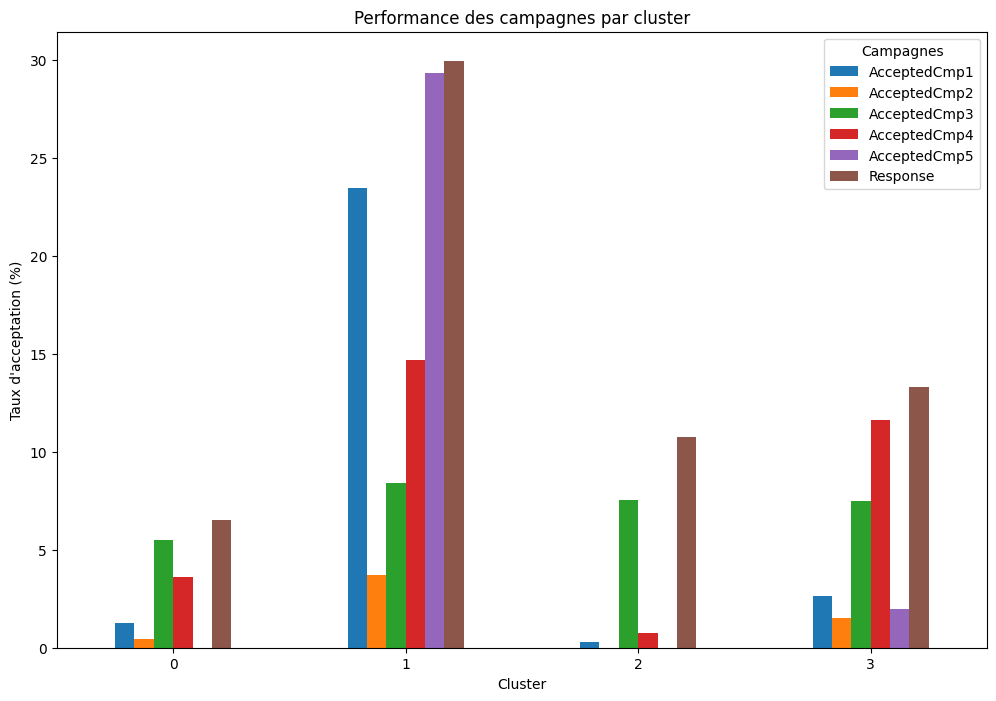

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Charger le jeu de données
df = pd.read_csv('Camp_Market.csv', sep=';')

# --- Nettoyage et Ingénierie des Caractéristiques (code réintégré pour l'exécution) ---

df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Age'] = 2015 - df['Year_Birth']
df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)
df['Dependents'] = df['Kidhome'] + df['Teenhome']
df = df[df['Age'] < 100]

# --- Segmentation des clients ---

clustering_features = ['Income', 'Total_Spending', 'Total_Purchases', 'Recency', 'Age', 'Dependents', 'Tenure_Days']
df_cluster = df.copy()
df_cluster.dropna(inplace=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[clustering_features])

# On utilise 4 clusters, comme supposé précédemment
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# --- Analyse de l'efficacité des campagnes par cluster ---

# Définir les colonnes des campagnes
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Calculer les taux d'acceptation par cluster
campaign_performance_by_cluster = df_cluster.groupby('Cluster')[campaign_cols].mean() * 100

print("Performance des campagnes par cluster (taux d'acceptation en %) :")
print(campaign_performance_by_cluster)

# Visualiser la performance
campaign_performance_by_cluster.plot(kind='bar', figsize=(12, 8))
plt.title("Performance des campagnes par cluster")
plt.xlabel('Cluster')
plt.ylabel("Taux d'acceptation (%)")
plt.xticks(rotation=0)
plt.legend(title='Campagnes')
plt.show()

## 9. Profilage des clusters

Une fois la segmentation des clients effectuée, la prochaine étape consiste à caractériser chaque groupe (cluster). Le profilage de cluster nous permet de comprendre les traits distinctifs de chaque segment de clientèle, comme leurs revenus moyens, leurs habitudes de dépenses, et leur ancienneté. Ces profils sont essentiels pour créer des stratégies de marketing ciblées et plus efficaces pour chaque type de client.


Profils des clients par cluster (valeurs moyennes) :
               Income  Total_Spending  Total_Purchases    Recency        Age  \
Cluster                                                                        
0        43253.377660      138.398734         9.556962  50.995781  51.575949   
1        78983.003924     1415.929550        20.170254  49.579256  46.219178   
2        31035.331551      109.784615         7.941538  48.567692  37.983077   
3        59498.517455      821.506645        22.038206  47.792359  50.445183   

         Dependents  Tenure_Days  Customer_Count  
Cluster                                           
0          1.879747   463.301688             474  
1          0.088063   523.422701             511  
2          0.812308   529.393846             650  
3          1.101329   625.134551             602  


/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/clus

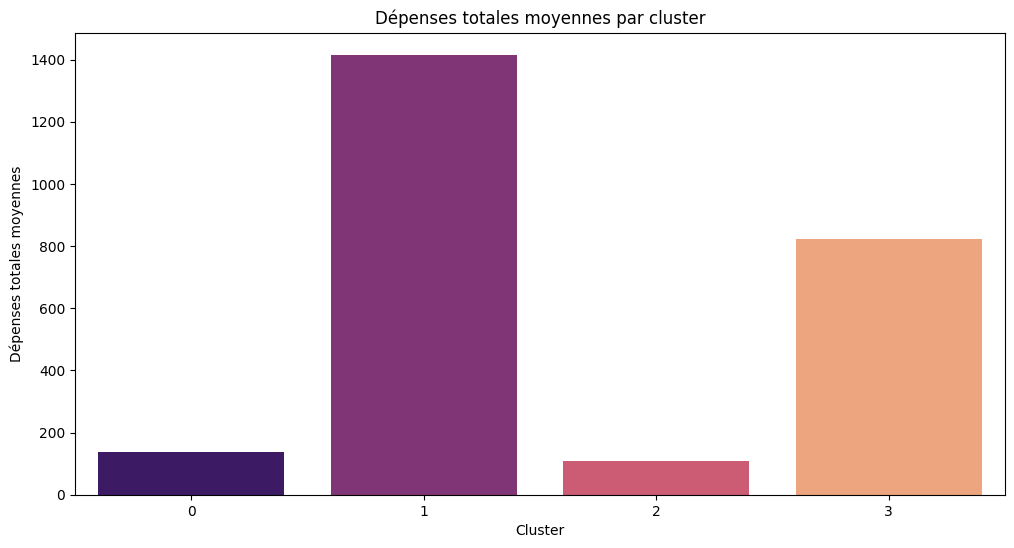

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Reload and prepare data to ensure it's fresh for this step
df = pd.read_csv('Camp_Market_cleaned.csv')
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Age'] = 2015 - df['Year_Birth']
df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)
df['Dependents'] = df['Kidhome'] + df['Teenhome']
df = df[df['Age'] < 100]

# Feature selection for clustering
clustering_features = ['Income', 'Total_Spending', 'Total_Purchases', 'Recency', 'Age', 'Dependents', 'Tenure_Days']

# Handle any remaining missing values and scale the data
df_cluster = df.copy()
df_cluster.dropna(inplace=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[clustering_features])

# Apply K-Means with 4 clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Profile the clusters
cluster_profiles = df_cluster.groupby('Cluster')[clustering_features].mean()
cluster_profiles['Customer_Count'] = df_cluster['Cluster'].value_counts()
cluster_profiles.sort_index(inplace=True)

print("\nProfils des clients par cluster (valeurs moyennes) :")
print(cluster_profiles)

# Visualize cluster profiles (average total spending)
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_profiles.index, y=cluster_profiles['Total_Spending'], palette='magma')
plt.title('Dépenses totales moyennes par cluster')
plt.xlabel('Cluster')
plt.ylabel('Dépenses totales moyennes')
plt.show()

## Analyse des dépenses par produit 

Dépenses par produit 

Dépenses moyennes par catégorie de produit :
MntWines            304.00
MntMeatProducts     166.92
MntGoldProds         43.97
MntFishProducts      37.52
MntSweetProducts     27.07
MntFruits            26.27
dtype: float64


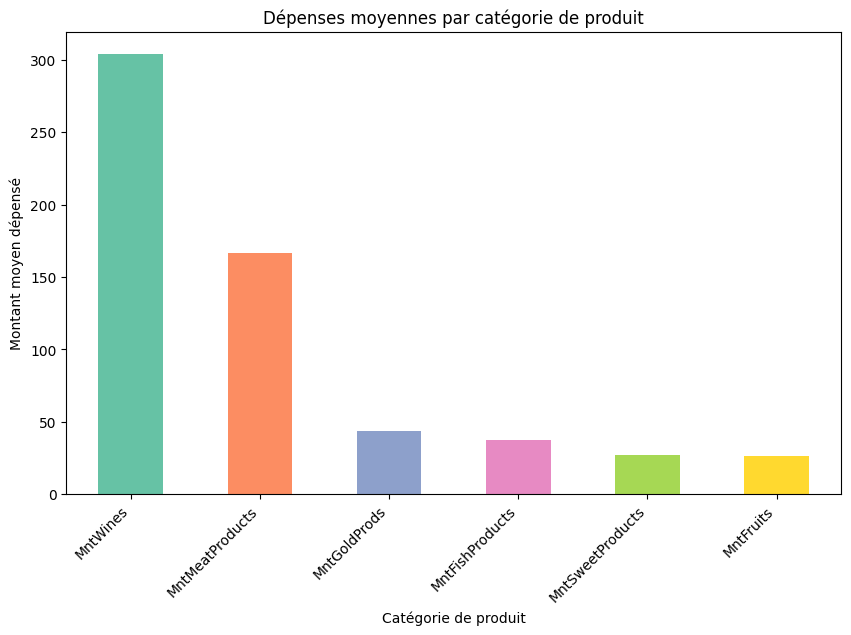

In [20]:
mean_spending = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().sort_values(ascending=False)

print("Dépenses moyennes par catégorie de produit :")
print(mean_spending.round(2))

# Visualisation pour confirmer la domination
plt.figure(figsize=(10, 6))
mean_spending.plot(kind='bar', color=sns.color_palette("Set2"))
plt.title('Dépenses moyennes par catégorie de produit')
plt.ylabel('Montant moyen dépensé')
plt.xlabel('Catégorie de produit')
plt.xticks(rotation=45, ha='right')
plt.show()

## 11. Analyse des canaux d'achat et de la réactivité des acheteurs Web

Cette analyse vise à comparer les volumes d'achats par canal (NumStorePurchases, NumWebPurchases, etc.) et à déterminer si les clients qui ont répondu à la dernière campagne (Response = 1) présentent une affinité particulière pour les achats en ligne.

Volume total d'achats par canal:
NumStorePurchases      12962
NumWebPurchases         9143
NumCatalogPurchases     5956
NumDealsPurchases       5205
dtype: int64

Moyenne des achats Web et Magasin par statut de réponse:
          NumWebPurchases  NumStorePurchases
Response                                    
0                    3.91               5.74
1                    5.07               6.10


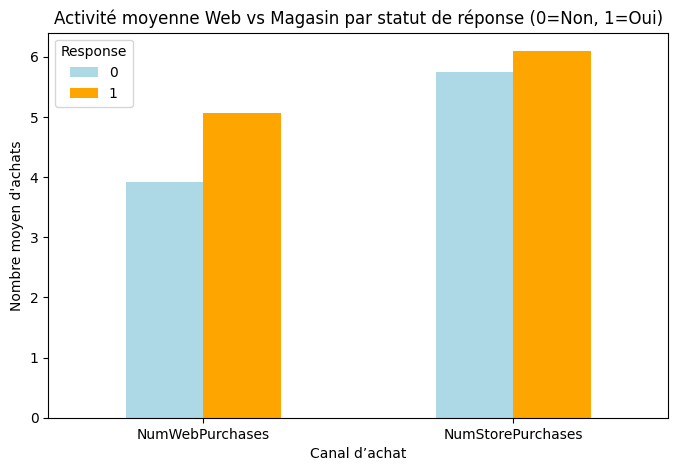

In [22]:
# Calcul du volume total d'achats par canal
channel_volume = df[['NumStorePurchases', 'NumWebPurchases', 
                             'NumCatalogPurchases', 'NumDealsPurchases']].sum().sort_values(ascending=False)

print("Volume total d'achats par canal:")
print(channel_volume)

# Comparaison des achats par canal entre les répondants (Response=1) et les non-répondants (Response=0)
purchase_by_response = df.groupby('Response')[['NumWebPurchases', 'NumStorePurchases']].mean()

print("\nMoyenne des achats Web et Magasin par statut de réponse:")
print(purchase_by_response.round(2))

# Visualisation de l'activité Web vs Magasin pour les répondants
purchase_by_response.T.plot(kind='bar', figsize=(8, 5), color=['lightblue', 'orange'])
plt.title('Activité moyenne Web vs Magasin par statut de réponse (0=Non, 1=Oui)')
plt.ylabel("Nombre moyen d'achats")
plt.xlabel('Canal d’achat')
plt.xticks(rotation=0)
plt.show()

## 12. Corrélation entre Dépenses Totales et Revenu

Avant de construire tout modèle, il est crucial de comprendre la relation entre les dépenses totales (Total_Spending) et le revenu (Income). Une corrélation forte indique une dépendance que les modèles devront gérer, souvent par normalisation ou standardisation des variables.

Corrélation entre Revenu et Dépenses Totales: 0.66


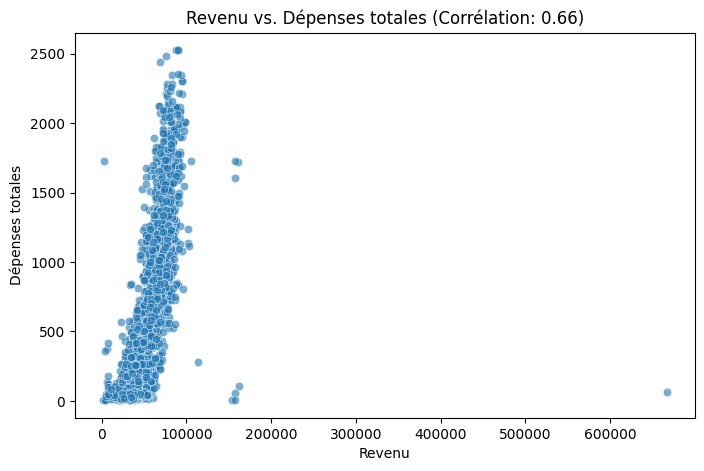

In [23]:
# Calcul de la corrélation
correlation = df[['Income', 'Total_Spending']].corr().iloc[0, 1]

print(f"Corrélation entre Revenu et Dépenses Totales: {correlation:.2f}")

# Visualisation de la corrélation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Income', y='Total_Spending', alpha=0.6)
plt.title(f'Revenu vs. Dépenses totales (Corrélation: {correlation:.2f})')
plt.xlabel('Revenu')
plt.ylabel('Dépenses totales')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# NOTE pour la modélisation: Si la corrélation est élevée, la standardisation (StandardScaler)
# sera nécessaire pour éviter que les variables à grande échelle ne dominent le modèle.

## 13. Exploration de segments Éducation et Statut Marital

L'étude des combinaisons Éducation et Statut Marital peut révéler des niches de clients spécifiques. En croisant ces deux facteurs, nous pouvons identifier des segments démographiques uniques pour cibler les futures campagnes.

Taux d'acceptation (Response) par segment Éducation x Statut Marital:
Education   Marital_Status
Graduation  Absurd            100.00
PhD         Alone             100.00
            YOLO               50.00
Master      Widow              50.00
PhD         Divorced           34.62
            Single             30.61
            Widow              29.17
Master      Single             24.00
2n Cycle    Divorced           22.73
Graduation  Single             20.63
Name: Response, dtype: float64


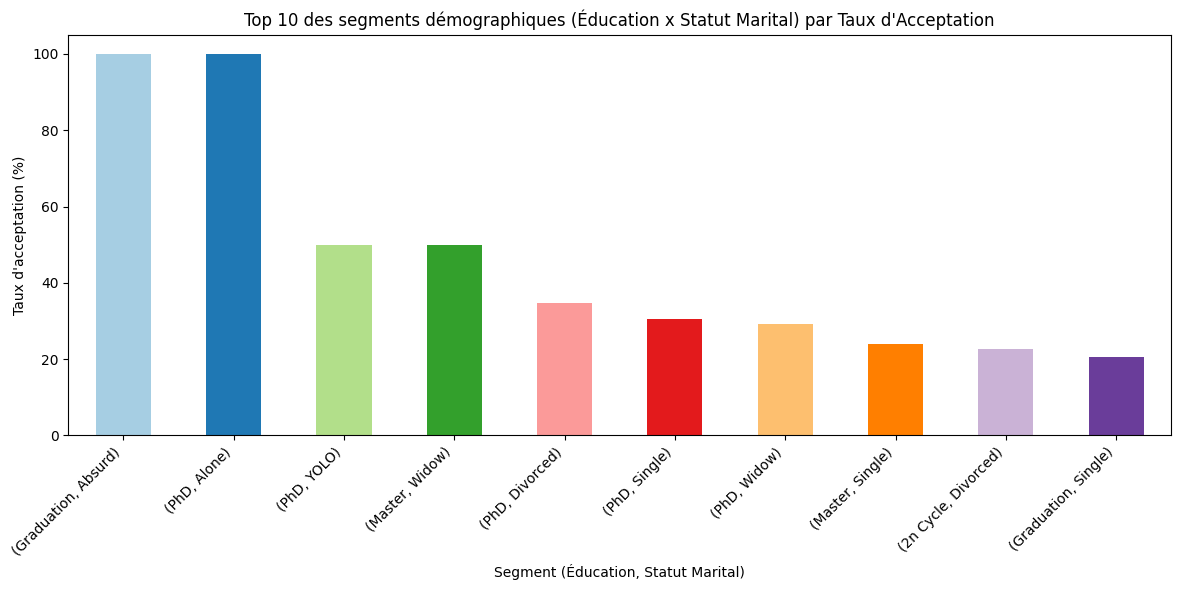

In [24]:
# Calcul du taux d'acceptation de la dernière campagne par combinaison Éducation/Statut Marital
response_rate_segments = df.groupby(['Education', 'Marital_Status'])['Response'].mean().sort_values(ascending=False) * 100

print("Taux d'acceptation (Response) par segment Éducation x Statut Marital:")
print(response_rate_segments.head(10).round(2))

# Visualisation des segments les plus réactifs
plt.figure(figsize=(12, 6))
response_rate_segments.head(10).plot(kind='bar', color=sns.color_palette("Paired"))
plt.title("Top 10 des segments démographiques (Éducation x Statut Marital) par Taux d'Acceptation")
plt.ylabel("Taux d'acceptation (%)")
plt.xlabel('Segment (Éducation, Statut Marital)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 14. Étude Temporelle : Cohortes d'ancienneté

L'analyse du temps écoulé depuis l'inscription du client (Dt_Customer) permet d'évaluer l'impact de l'ancienneté (ou la cohorte) sur la fidélité (dépenses, récence) et la réactivité aux campagnes.

Analyse des cohortes (Année d'inscription):
                 Mean_Spending  Response_Rate
Enrollment_Year                              
2012                    745.48           0.27
2013                    601.10           0.13
2014                    491.50           0.09


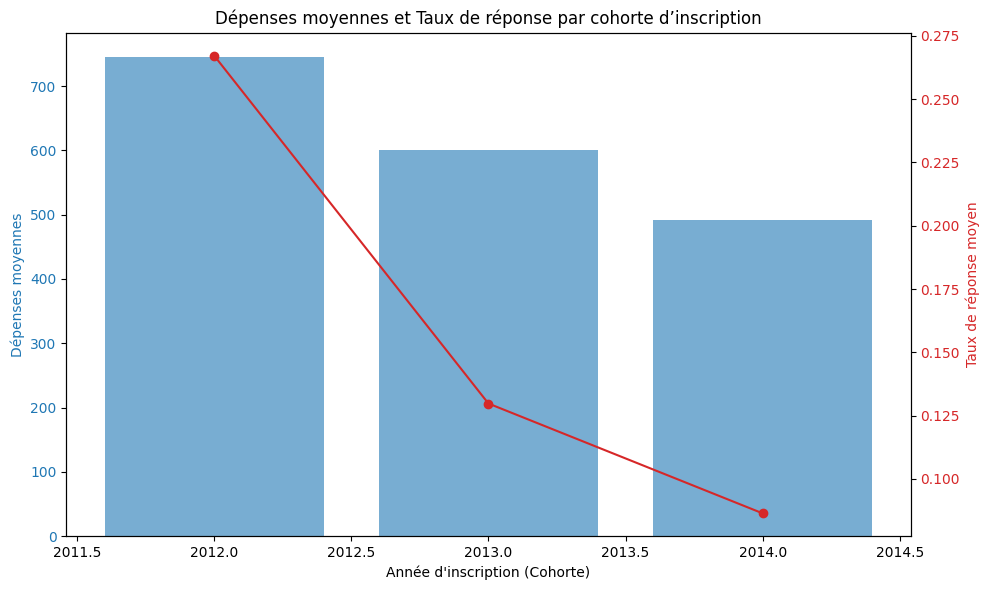

In [25]:
# Création d'une cohorte par année d'inscription
df['Enrollment_Year'] = df['Dt_Customer'].dt.year

# Analyse des dépenses moyennes et du taux de réponse par année de cohorte
cohort_analysis = df.groupby('Enrollment_Year').agg(
    Mean_Spending=('Total_Spending', 'mean'),
    Response_Rate=('Response', 'mean')
).sort_index()

print("Analyse des cohortes (Année d'inscription):")
print(cohort_analysis.round(2))

# Visualisation de la tendance des dépenses moyennes par cohorte
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel("Année d'inscription (Cohorte)")
ax1.set_ylabel('Dépenses moyennes', color=color)
ax1.bar(cohort_analysis.index, cohort_analysis['Mean_Spending'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Dépenses moyennes et Taux de réponse par cohorte d’inscription')

# Deuxième axe pour le taux de réponse
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Taux de réponse moyen", color=color)
ax2.plot(cohort_analysis.index, cohort_analysis['Response_Rate'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

### MODEL PREDICTIF 

## Codage des variables catégorielles 

/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/clus

--- Évaluation du Modèle Random Forest ---
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       476
           1       0.61      0.51      0.55        84

    accuracy                           0.88       560
   macro avg       0.76      0.73      0.74       560
weighted avg       0.87      0.88      0.87       560


AUC Score (Capacité de Distinguer les Classes) : 0.8973


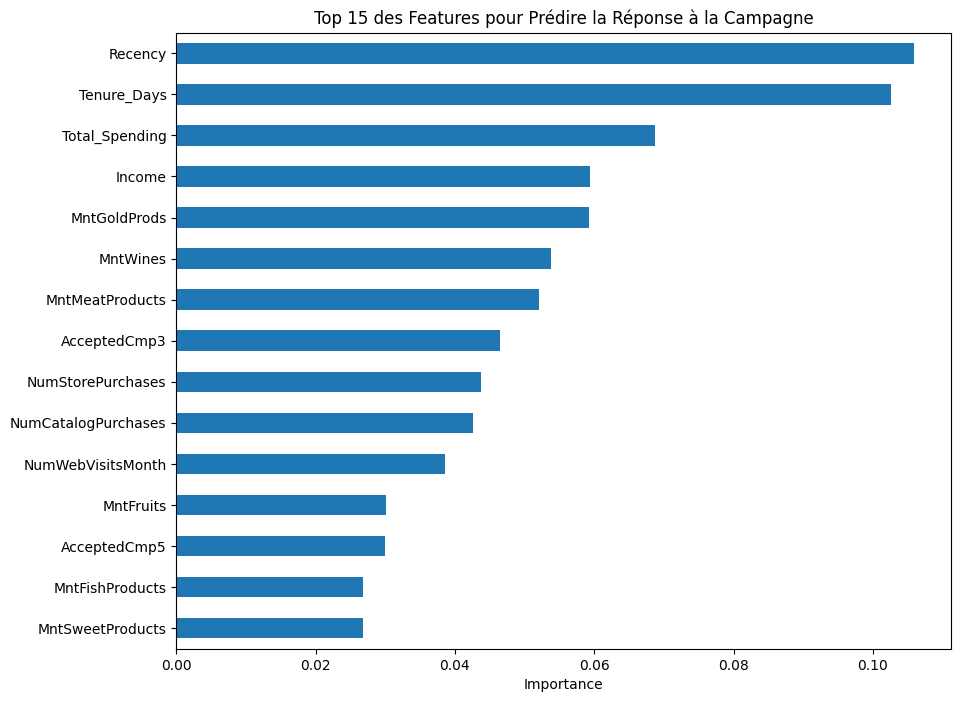

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Préparation des Données et Ingénierie des Features (Récapitulatif de votre travail)
df = pd.read_csv('Camp_Market_cleaned.csv')
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Age'] = 2015 - df['Year_Birth']
df = df[df['Age'] < 100].copy() 
df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)
purchase_cols = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# 2. Intégration du Cluster K-Means
clustering_features = ['Income', 'Total_Spending', 'Total_Purchases', 'Recency', 'Age', 'Dependents', 'Tenure_Days']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[clustering_features])

# On utilise le K=4 trouvé lors de l'analyse précédente
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled) # Ajout du résultat de la segmentation comme feature

# 3. Préparation pour la Classification Supervised
# Encodage One-Hot des variables catégorielles (Education, Marital_Status et Cluster)
categorical_cols = ['Education', 'Marital_Status']
# Le cluster est déjà numérique, mais le traiter comme catégoriel peut être utile via one-hot
df['Cluster'] = df['Cluster'].astype('category') 
df_model = pd.get_dummies(df, columns=categorical_cols + ['Cluster'], drop_first=True)

# Définir les Features (X) et la Cible (y)
# On retire les colonnes d'identification, de date et de naissance qui ont été converties en 'Age' et 'Tenure_Days'
X = df_model.drop(columns=['ID', 'Year_Birth', 'Dt_Customer', 'Response'])
y = df_model['Response']

# 4. Séparation Train/Test
# Utilisation de stratify=y pour garantir que la proportion de 'Response=1' est la même dans les deux jeux de données.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 5. Entraînement du Modèle Random Forest
model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 6. Évaluation du Modèle
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("--- Évaluation du Modèle Random Forest ---")
print(classification_report(y_test, y_pred))
print(f"\nAUC Score (Capacité de Distinguer les Classes) : {roc_auc_score(y_test, y_proba):.4f}")

# 7. Analyse de l'Importance des Features
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
feature_importances.nlargest(15).sort_values().plot(kind='barh')
plt.title("Top 15 des Features pour Prédire la Réponse à la Campagne")
plt.xlabel("Importance")
plt.show()

/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/clus

Début de l'analyse de l'efficacité prédictive de chaque campagne...
  AcceptedCmp1 - AUC: 0.9268, F1-Score: 0.4783
  AcceptedCmp2 - AUC: 0.9047, F1-Score: 0.3333
  AcceptedCmp3 - AUC: 0.8761, F1-Score: 0.3871
  AcceptedCmp4 - AUC: 0.8741, F1-Score: 0.4878
  AcceptedCmp5 - AUC: 0.9457, F1-Score: 0.5098
  Response - AUC: 0.8761, F1-Score: 0.5175

--- Synthèse des Performances Prédictives (Métriques pour la Classe 1: Accepté) ---
                 AUC  Precision  Recall  F1-Score
AcceptedCmp1  0.9268     0.3929  0.6111    0.4783
AcceptedCmp2  0.9047     0.5000  0.2500    0.3333
AcceptedCmp3  0.8761     0.5714  0.2927    0.3871
AcceptedCmp4  0.8741     0.5000  0.4762    0.4878
AcceptedCmp5  0.9457     0.4262  0.6341    0.5098
Response      0.8761     0.6271  0.4405    0.5175


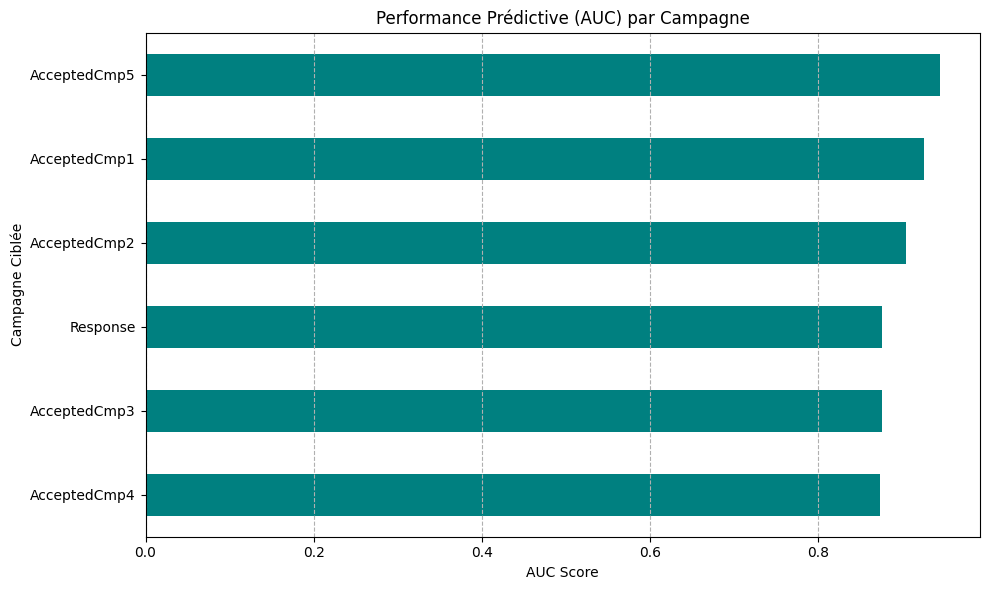

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# --- 1. Préparation des Données et Ingénierie des Features ---
def prepare_data(df):
    """Effectue le nettoyage initial, l'ingénierie des features RFM/démographiques."""
    df['Income'] = df['Income'].fillna(df['Income'].mean())
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Age'] = 2015 - df['Year_Birth']
    df = df[df['Age'] < 100].copy() 
    df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

    spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
    df['Total_Spending'] = df[spending_cols].sum(axis=1)
    purchase_cols = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']
    df['Total_Purchases'] = df[purchase_cols].sum(axis=1)
    df['Dependents'] = df['Kidhome'] + df['Teenhome']
    return df

# --- 2. K-Means Segmentation et Ajout du Cluster ---
def add_kmeans_cluster(df, n_clusters=4):
    """Effectue la segmentation K-Means et ajoute le Cluster comme feature catégorielle."""
    clustering_features = ['Income', 'Total_Spending', 'Total_Purchases', 'Recency', 'Age', 'Dependents', 'Tenure_Days']
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[clustering_features])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(df_scaled)
    df['Cluster'] = df['Cluster'].astype('category') 
    return df

# --- 3. Fonction de Modélisation et Prédiction de Campagne ---
def predict_campaign_efficiency(df, campaign_target):
    """
    Construit un modèle Random Forest pour prédire la réponse à une campagne spécifique.
    Les campagnes chronologiquement ultérieures sont exclues des features.
    """
    y = df[campaign_target]
    
    # Exclure les colonnes d'ID/date/naissance et la colonne cible elle-même
    excluded_cols = ['ID', 'Year_Birth', 'Dt_Customer', 'Response', campaign_target]
    
    # Assumer l'ordre chronologique: Cmp1 < Cmp2 < Cmp3 < Cmp4 < Cmp5 < Response
    campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
    
    # Exclure toutes les colonnes de réponse de campagne qui viennent APRÈS la cible actuelle
    try:
        target_index = campaign_cols.index(campaign_target)
    except ValueError:
        target_index = -1 
        
    for col in campaign_cols[target_index + 1:]:
        if col not in excluded_cols:
            excluded_cols.append(col)

    # Création du jeu de features (X)
    X_cols = [col for col in df.columns if col not in excluded_cols]
    
    # Encodage One-Hot
    categorical_cols = ['Education', 'Marital_Status', 'Cluster']
    X_base = df[X_cols]
    X = pd.get_dummies(X_base, columns=[c for c in categorical_cols if c in X_base.columns], drop_first=True)
    X = X.select_dtypes(include=np.number)
    
    # Split et Scaling
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )
    
    scaler_pred = StandardScaler()
    X_train = pd.DataFrame(scaler_pred.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler_pred.transform(X_test), columns=X_test.columns)

    # Modèle Random Forest avec pondération de classe pour gérer le déséquilibre
    model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Métriques pour la classe positive (1)
    results = {
        'AUC': roc_auc_score(y_test, y_proba),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    }
    
    return results

# --- 4. Exécution Principale ---
if __name__ == '__main__':
    # Charger et préparer les données
    df_raw = pd.read_csv('Camp_Market_cleaned.csv')
    df_processed = prepare_data(df_raw.copy())
    df_clustered = add_kmeans_cluster(df_processed)

    # Liste des campagnes à évaluer
    campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
    all_results = {}

    print("Début de l'analyse de l'efficacité prédictive de chaque campagne...")
    for cmp in campaigns:
        if df_clustered[cmp].sum() < 20: 
             print(f"Skipping {cmp}: échantillons positifs insuffisants.")
             continue
             
        try:
            results = predict_campaign_efficiency(df_clustered.copy(), cmp)
            all_results[cmp] = results
            print(f"  {cmp} - AUC: {results['AUC']:.4f}, F1-Score: {results['F1-Score']:.4f}")
        except Exception as e:
            print(f"  Erreur lors de l'exécution pour {cmp}: {e}")

    # Affichage des résultats
    results_df = pd.DataFrame(all_results).T
    print("\n--- Synthèse des Performances Prédictives (Métriques pour la Classe 1: Accepté) ---")
    print(results_df.round(4))

    # Visualisation
    plt.figure(figsize=(10, 6))
    results_df['AUC'].sort_values().plot(kind='barh', color='teal')
    plt.title('Performance Prédictive (AUC) par Campagne')
    plt.xlabel('AUC Score')
    plt.ylabel('Campagne Ciblée')
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from datetime import datetime

# --- Global Definitions (for consistent processing) ---
CURRENT_YEAR = 2025
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
campaign_targets = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
drop_cols = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Complain']

# --- 1. Data Loading and Cleaning ---
df = pd.read_csv("Camp_Market_cleaned.csv")

# Impute missing Income values with the median (must be done on the full dataset before split)
df['Income'].fillna(df['Income'].median(), inplace=True)

# Find the reference date for tenure calculation (must be done before defining the function)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
REFERENCE_DATE = df['Dt_Customer'].max()
df.drop(columns='Dt_Customer', inplace=True) # Dropping original date column before defining features

# --- Preprocessing Function (Applies to Training and New Data) ---
def preprocess_data(data_df, reference_date, is_training=False, train_features=None):
    """
    Applies all necessary feature engineering and encoding for modeling.
    :param data_df: DataFrame to process.
    :param reference_date: The latest Dt_Customer date from the training set.
    :param is_training: If True, uses drop_first=True for OHE.
    :param train_features: List of features from the training set for alignment.
    :return: Processed DataFrame.
    """
    data_df_copy = data_df.copy()

    # Feature Engineering
    data_df_copy['Age'] = CURRENT_YEAR - data_df_copy['Year_Birth']
    
    # Customer Tenure (Handle Dt_Customer conversion and calculation)
    if 'Dt_Customer' in data_df_copy.columns:
        data_df_copy['Dt_Customer'] = pd.to_datetime(data_df_copy['Dt_Customer'])
        data_df_copy['Customer_Tenure_Days'] = (reference_date - data_df_copy['Dt_Customer']).dt.days
    
    # Total Spending
    data_df_copy['Total_Mnt'] = data_df_copy[mnt_cols].sum(axis=1)
    
    # Children count
    data_df_copy['Children'] = data_df_copy['Kidhome'] + data_df_copy['Teenhome']
    
    # Drop columns
    data_df_copy.drop(columns=drop_cols, inplace=True, errors='ignore')

    # Encoding Categorical Data
    # Drop_first=True is used for training data to avoid multicollinearity
    data_df_encoded = pd.get_dummies(data_df_copy, columns=['Education', 'Marital_Status'], drop_first=is_training)
    
    if not is_training and train_features is not None:
        # Align columns for new data: add missing dummy variables and reorder
        missing_cols = set(train_features) - set(data_df_encoded.columns)
        for c in missing_cols:
            data_df_encoded[c] = 0
        data_df_encoded = data_df_encoded[train_features]
    
    return data_df_encoded.fillna(0) # Fill NaN from missing dummy variables with 0

# Apply preprocessing to the full dataset to get final feature list for consistency
df_processed = preprocess_data(df.copy(), REFERENCE_DATE, is_training=True)

# --- 4. Define Features (X) and Targets (Y) ---
X = df_processed.drop(columns=campaign_targets, errors='ignore')
Y = df_processed[campaign_targets]
train_features = X.columns.tolist()

# --- 5. Split Data ---
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# --- 6. Model Building and Training (Independent Binary Classifiers) ---
models = {}
predictions_test = pd.DataFrame(index=X_test.index)

print("Training independent binary classifiers for each campaign...")

for target in campaign_targets:
    print(f"\nEntraînement du model pour: {target}")
    
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    model.fit(X_train, Y_train[target])
    
    models[target] = model
    
    # Test set evaluation
    Y_pred_proba = model.predict_proba(X_test)[:, 1]
    predictions_test[f'P_{target}'] = Y_pred_proba
    Y_pred = model.predict(X_test)
    print(f"Classification pour {target}:\n{classification_report(Y_test[target], Y_pred, zero_division=0)}")


# --- 7. Prediction and Best Campaign Assignment for Test Clients ---
print("\n" + "="*50)
print("Prédire la meilleure campagne pour le client test")
print("="*50)

probability_cols = [f'P_{c}' for c in campaign_targets]
predictions_test['Predicted_Best_Campaign'] = (
    predictions_test[probability_cols].idxmax(axis=1).str.replace('P_', '')
)
predictions_test['Best_Campaign_Probability'] = predictions_test[probability_cols].max(axis=1)

print("\nSample Clients (Test Set) and their Predicted Best Campaign:")
print(predictions_test[['Predicted_Best_Campaign', 'Best_Campaign_Probability']].head(10))


# --- 8. Apply to New Mock Client Data ---

print("\n" + "="*50)
print("Prédiction pour NEW CLIENT")
print("="*50)

# New Client Data
mock_client_data = {
    'ID': 9999, 'Year_Birth': 1980, 'Education': 'Graduation', 'Marital_Status': 'Married',
    'Income': 100000.0, 'Kidhome': 0, 'Teenhome': 0, 'Dt_Customer': '2023-01-01', 
    'Recency': 5, 'MntWines': 1500, 'MntFruits': 10, 'MntMeatProducts': 20, 
    'MntFishProducts': 5, 'MntSweetProducts': 5, 'MntGoldProds': 100, 
    'NumDealsPurchases': 0, 'NumWebPurchases': 10, 'NumCatalogPurchases': 5, 
    'NumStorePurchases': 3, 'NumWebVisitsMonth': 2
    # Campaign acceptance status is unknown/irrelevant for a new client prediction
}
mock_df = pd.DataFrame([mock_client_data])

# Impute missing Income for the mock client if necessary (though not for this mock example)
mock_df['Income'].fillna(df['Income'].median(), inplace=True)

# Preprocess the mock client data, aligning it to the training features
X_new = preprocess_data(mock_df, REFERENCE_DATE, is_training=False, train_features=train_features)


# Generate predictions for the new client
final_predictions = pd.DataFrame(index=X_new.index)
for target, model in models.items():
    final_predictions[f'P_{target}'] = model.predict_proba(X_new)[:, 1]

# Determine the best campaign
probability_cols_new = [f'P_{c}' for c in campaign_targets]
final_predictions['Best_Campaign_Probability'] = final_predictions[probability_cols_new].max(axis=1)
final_predictions['Predicted_Best_Campaign'] = (
    final_predictions[probability_cols_new].idxmax(axis=1).str.replace('P_', '')
)

# Format and print results
probabilities = final_predictions.iloc[0].filter(like='P_')
probabilities.index = probabilities.index.str.replace('P_AcceptedCmp', 'Campaign ').str.replace('P_Response', 'Campaign 6 (Main)')

print("\nMock Client Profile Summary:")
print(f"- Income: ${mock_client_data['Income']:,}")
print(f"- Wine Spend: ${mock_client_data['MntWines']:,}")
print(f"- Recency: {mock_client_data['Recency']} days")

print("\nPredicted Acceptance Probabilities (100% is certain):")
print(probabilities.sort_values(ascending=False).to_string())

print("\n" + "-"*50)
best_campaign = final_predictions['Predicted_Best_Campaign'].iloc[0]
best_probability = final_predictions['Best_Campaign_Probability'].iloc[0]

# Display the prediction result
print(f"RECOMMENDATION: Campagne {best_campaign.replace('Response', '6 (Main)')}")
print(f"CONFIENCE: {best_probability:.2f}")
print("-"*50)


/var/folders/9y/hlyw969519722zx5yt0_vwvm0000gn/T/ipykernel_85127/465489492.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


Training independent binary classifiers for each campaign...

Entraînement du model pour: AcceptedCmp1
Classification Report for AcceptedCmp1:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       419
           1       0.83      0.17      0.29        29

    accuracy                           0.94       448
   macro avg       0.89      0.59      0.63       448
weighted avg       0.94      0.94      0.93       448


Entraînement du model pour: AcceptedCmp2
Classification Report for AcceptedCmp2:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       439
           1       1.00      0.33      0.50         9

    accuracy                           0.99       448
   macro avg       0.99      0.67      0.75       448
weighted avg       0.99      0.99      0.98       448


Entraînement du model pour: AcceptedCmp3
Classification Report for AcceptedCmp3:
              precision    recall  f1-s

/var/folders/9y/hlyw969519722zx5yt0_vwvm0000gn/T/ipykernel_85127/465489492.py:133: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mock_df['Income'].fillna(df['Income'].median(), inplace=True)
